<a href="https://colab.research.google.com/github/Vecheslav-Eremeev/seaborn_dataset_projects/blob/main/Seaborn_Diamonds_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

Load Data

In [3]:
data = sns.load_dataset('diamonds')
data.shape

(53940, 10)

In [4]:
data.keys()

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
X = data.drop('price', axis=1)
y = data['price']

In [8]:
X = pd.get_dummies(X, drop_first=True)
X.shape

(53940, 23)

In [9]:
X = StandardScaler().fit_transform(X)

In [10]:
random_seed = 42

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed, test_size=0.25)

Train Models

In [12]:
num_folds = 10
n_iter = 1000
n_estimators = 100
scoring = 'r2'

In [20]:
models = [
          LinearRegression(),
          Ridge(),
          Lasso(),
          ElasticNet(),
          BayesianRidge(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          LinearSVR(),
          RandomForestRegressor(n_estimators=n_estimators),
          AdaBoostRegressor(n_estimators=n_estimators),
          BaggingRegressor(n_estimators=n_estimators),
          GradientBoostingRegressor(n_estimators=n_estimators),
          HistGradientBoostingRegressor(),
          XGBRegressor(silent=True),
          LGBMRegressor(silent=True)
]

In [21]:
pipelines = []
scores = []
names = []
results = []
predictions = []
msgs = []

In [22]:
for model in models:
  name = 'SS ' + model.__class__.__name__
  pipelines.append((name, Pipeline([('Scaler', StandardScaler()),
                                    (model.__class__.__name__, model)])))

In [23]:
def train_models(pipelines):
  for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=random_seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    predictions.append(predict)
    m_score = model.score(X_test, y_test)
    scores.append(m_score)
    msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(),
                           cv_results.std(), m_score)
    msgs.append(msg)
    print(msg)

In [24]:
def show_result(title='Title'):
  fig = plt.figure()
  fig.suptitle(title)
  ax = fig.add_subplot(111)
  red_square = dict(markerfacecolor='r', marker='s')
  plt.boxplot(results, flierprops=red_square)
  ax.set_xticklabels(names, rotation=80)
  plt.show()

In [25]:
train_models(pipelines)

SS LinearRegression: train = 0.919 (0.005) / test = 0.920
SS Ridge: train = 0.919 (0.005) / test = 0.920
SS Lasso: train = 0.920 (0.005) / test = 0.920
SS ElasticNet: train = 0.838 (0.010) / test = 0.843
SS BayesianRidge: train = 0.919 (0.005) / test = 0.920
SS KNeighborsRegressor: train = 0.953 (0.005) / test = 0.956
SS DecisionTreeRegressor: train = 0.964 (0.002) / test = 0.965
SS LinearSVR: train = 0.860 (0.004) / test = 0.867
SS RandomForestRegressor: train = 0.980 (0.001) / test = 0.980
SS AdaBoostRegressor: train = 0.745 (0.010) / test = 0.868
SS BaggingRegressor: train = 0.980 (0.001) / test = 0.980
SS GradientBoostingRegressor: train = 0.960 (0.003) / test = 0.961
SS HistGradientBoostingRegressor: train = 0.980 (0.001) / test = 0.980
SS XGBRegressor: train = 0.960 (0.003) / test = 0.961
SS LGBMRegressor: train = 0.981 (0.001) / test = 0.981


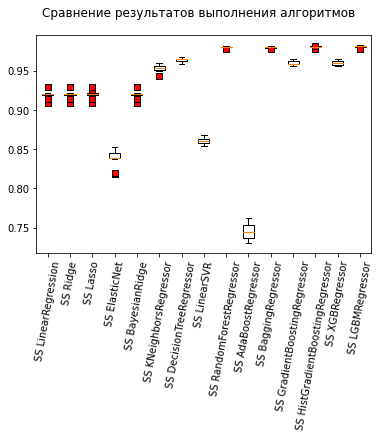

In [26]:
show_result('Сравнение результатов выполнения алгоритмов')

In [28]:
best_models = [
          KNeighborsRegressor(),
          DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=n_estimators),
          BaggingRegressor(n_estimators=n_estimators),
          GradientBoostingRegressor(n_estimators=n_estimators),
          HistGradientBoostingRegressor(),
          XGBRegressor(silent=True),
          LGBMRegressor(silent=True)
]

In [29]:
estimators = []
for model in best_models:
  estimators.append((model.__class__.__name__, model))

In [33]:
model_voting = VotingRegressor(estimators=estimators)
kfold = KFold(n_splits=num_folds, random_state=random_seed, shuffle=True)
cv_results = cross_val_score(model_voting, X_train, y_train, cv=kfold)
print('CV results:', cv_results)
print('Mean:', cv_results.mean())

CV results: [0.9793375  0.97871533 0.97904244 0.97988006 0.9767741  0.98009827
 0.97863713 0.97894878 0.98084858 0.97977833]
Mean: 0.9792060522435684


In [35]:
model_voting.fit(X_train, y_train)
model_voting.score(X_test, y_test)

0.9796031015341553